In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loadig the dataset using the normalised csv files
fordMergeData = pd.read_csv('../csv2/Normal/fNormal.csv') 
teslaMergeData = pd.read_csv('../csv2/Normal/tNormal.csv')
benzMergeData = pd.read_csv('../csv2/Normal/bNormal.csv')

In [3]:
# Calculate Working Capital for each dataset using Total current assests and liabilities
fordMergeData['Working Capital'] = fordMergeData['Total Current Assets'] - fordMergeData['Total Current Liabilities']
benzMergeData['Working Capital'] = benzMergeData['Total Current Assets'] - benzMergeData['Total Current Liabilities']
teslaMergeData['Working Capital'] = teslaMergeData['Total Current Assets'] - teslaMergeData['Total Current Liabilities']

In [4]:
# State the input variables from the dataset
inputed_values = ['Revenue','Net Income', 'Net Income/Loss', 'Net Cash Flow','ROE - Return On Equity', 'Book Value Per Share',
            'Free Cash Flow Per Share', 'Working Capital']

# State the expected output (profit) variables from the dataset
expected_output = 'Gross Profit'

# Verify that the dataset contains stated input for Ford.
if not all(inptF in fordMergeData.columns for inptF in inputed_values):
    raise ValueError("Missing inputs in the dataset for Ford.")

# Verify that the dataset contains stated input for Mercedes-benz.
if not all(inptM in benzMergeData.columns for inptM in inputed_values):
    raise ValueError("Missing inputs in the dataset for Mercedes.")

# Verify that the dataset contains stated input for Tesla.
if not all(inptT in teslaMergeData.columns for inptT in inputed_values):
    raise ValueError("Missing inputs in the dataset for Tesla.")

Mean Squared Error (F): 0.022579855690336086
Mean Squared Error (M): 0.020638616633733214
Mean Squared Error (T): 0.06155758280102085
R-Square (F): 0.38444207460496715
R-Square (M): 0.416319129730351
R-Square (T): 0.1393273914360894


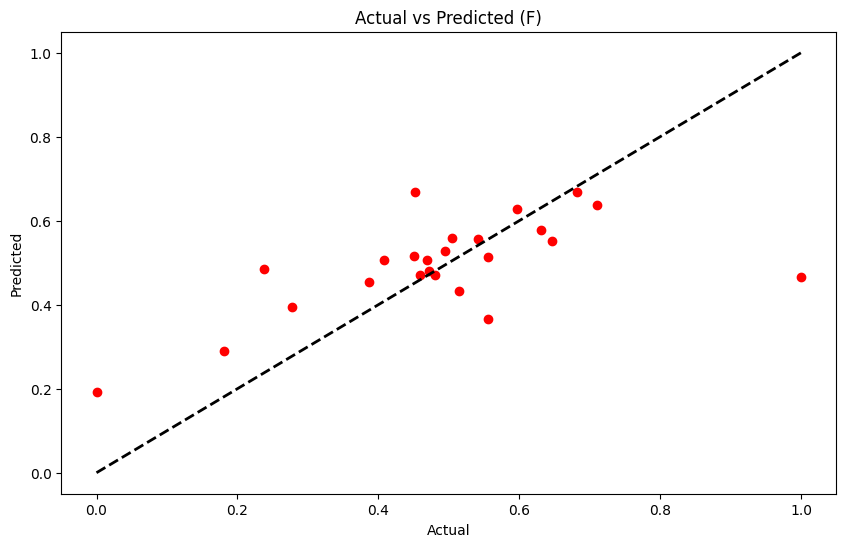

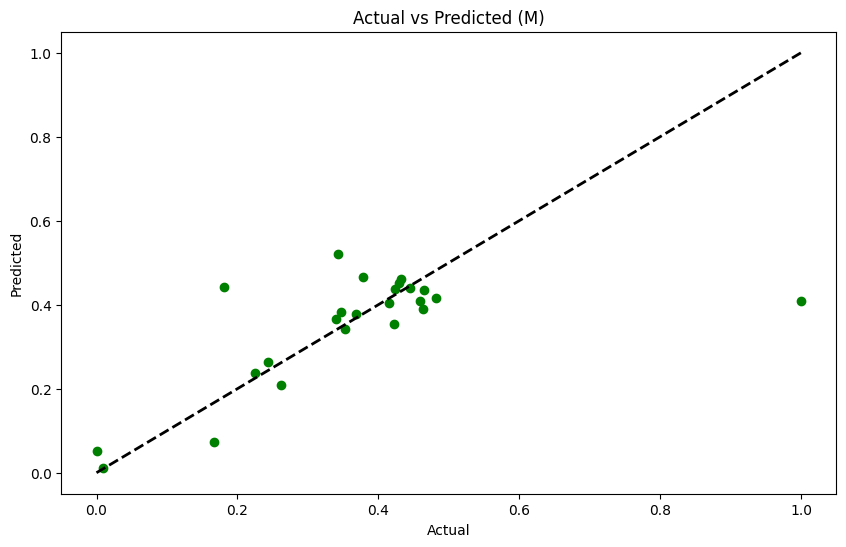

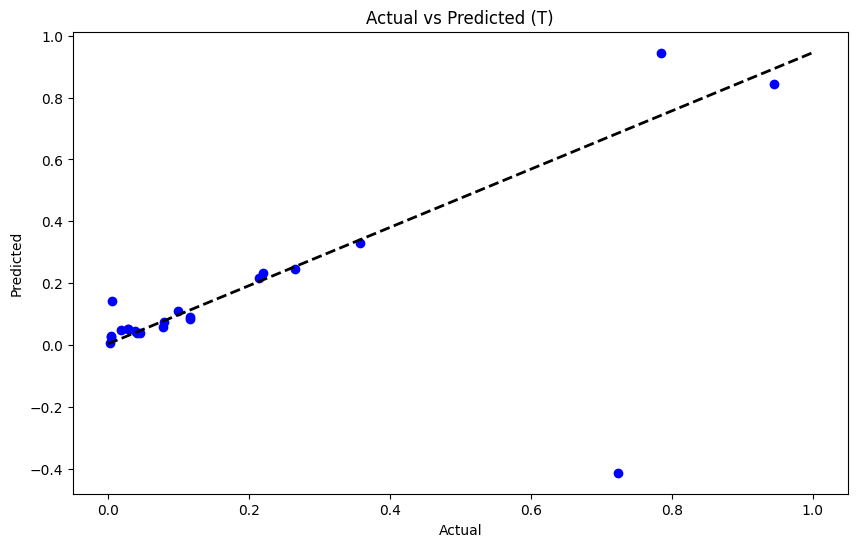

In [5]:
# Spliting the data up into inputs and output variables for Ford.
fordInt = fordMergeData[inputed_values]
fordOut = fordMergeData[expected_output]

# Spliting the data up into inputs and output variables for Mercedes-benz.
benzInt = benzMergeData[inputed_values]
benzOut = benzMergeData[expected_output]

# Spliting the data up into inputs and output variables for Tesla.
teslaInt = teslaMergeData[inputed_values]
teslaOut = teslaMergeData[expected_output]

# Creation of variables for spliting the data up into training and testing groups for each of the companies
fordIntTrain, fordIntTest, fordOutTrain, fordOutTest = train_test_split(fordInt, fordOut, test_size=0.4, random_state=19)
benzIntTrain, benzIntTest, benzOutTrain, benzOutTest = train_test_split(benzInt, benzOut, test_size=0.4, random_state=19)
teslaIntTrain, teslaIntTest, teslaOutTrain, teslaOutTest = train_test_split(teslaInt, teslaOut, test_size=0.4, random_state=19)

# Setting up the model for the Linear Regression for each of the companies
fordLR = LinearRegression()
benzLR = LinearRegression()
teslaLR = LinearRegression()

# Fitting model into the training data using input and outputs of each of the comapnies
fordLR.fit(fordIntTrain, fordOutTrain)
benzLR.fit(benzIntTrain, benzOutTrain)
teslaLR.fit(teslaIntTrain, teslaOutTrain)

# Making predictions using the testing set inputs and models of each of the comapnies
fordPredict = fordLR.predict(fordIntTest)
benzPredict = benzLR.predict(benzIntTest)
teslaPredict = teslaLR.predict(teslaIntTest)



# Evaluation of all Models using MSE and R-Squared Methods

# Calculate Mean Squared Error using expected outputs and predicted values for Ford 
fordMean = mean_squared_error(fordOutTest, fordPredict)
print("Mean Squared Error (F):", fordMean)

# Calculate Mean Squared Error using expected outputs and predicted values for Mercedes-benz
benzMean = mean_squared_error(benzOutTest, benzPredict)
print("Mean Squared Error (M):", benzMean)

# Calculate Mean Squared Error using expected outputs and predicted values for Tesla
teslaMean = mean_squared_error(teslaOutTest, teslaPredict)
print("Mean Squared Error (T):", teslaMean)

# Calculate R-Squared score using expected outputs and predicted values for Ford
fordRSquare = r2_score(fordOutTest, fordPredict)
print("R-Square (F):", fordRSquare)

# Calculate R-Squared score using expected outputs and predicted values for Mercedes-benz
benzRSquare = r2_score(benzOutTest, benzPredict)
print("R-Square (M):", benzRSquare)

# Calculate R-Squared score using expected outputs and predicted values for Tesla
teslaRSquare = r2_score(teslaOutTest, teslaPredict)
print("R-Square (T):", teslaRSquare)

# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Ford (Red).
plt.figure(figsize=(10, 6))
plt.scatter(fordOutTest, fordPredict, color='red', label="Predicted")
plt.plot([fordOutTest.min(), fordOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (F)")
plt.show()

# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Mercedes-benz (Green).
plt.figure(figsize=(10, 6))
plt.scatter(benzOutTest, benzPredict, color='green', label="Predicted")
plt.plot([benzOutTest.min(), benzOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (M)")
plt.show()

# Scatter Plot predicted and actual profits values using expected outputs and predicted values for Tesla (Blue).
plt.figure(figsize=(10, 6))
plt.scatter(teslaOutTest, teslaPredict, color='blue', label="Predicted")
plt.plot([teslaOutTest.min(), teslaOutTest.max()], 'k--', lw=2, label="Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (T)")
plt.show()


In [6]:
# Scoring function used for evaluation of Mean Squared Error values for ford
ford_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for ford
ford_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 

# Calculate the scores for evaluation of Mean Squared Error values for ford
ford_score_eval_mse = -cross_val_score(fordLR, fordIntTrain, fordOutTrain, cv=k, scoring=ford_score_eval_mse)

# Calculate the scores for evaluation of R-Squared values for ford
ford_score_eval_sq = cross_val_score(fordLR, fordIntTrain, fordOutTrain, cv=k, scoring=ford_score_eval_sq)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values for ford
ford_meanVal_eval_mse = ford_score_eval_mse.mean()
ford_meanVal_eval_sq = ford_score_eval_sq.mean()

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values for ford
ford_dev_eval_mse = ford_score_eval_mse.std()
ford_dev_eval_sq = ford_score_eval_sq.std()

# Printing the derived results for ford
print("Cross-Validation Results (Ford):")

# Printing the results for evaluation of Mean Squared Error values for ford
print("Mean (MSE):" , ford_meanVal_eval_mse)
print("Standard Deviation (MSE):" , ford_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for ford
print("Mean (R-Squared):" , ford_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , ford_dev_eval_sq, "\n")

Cross-Validation Results (Ford):
Mean (MSE): 0.026329988615426535
Standard Deviation (MSE): 0.026488871571398866 

Mean (R-Squared): -0.6811317312987264
Standard Deviation (R-Squared): 0.7893778315075778 



In [7]:
# Scoring function used for evaluation of Mean Squared Error values for Mercedes-benz
benz_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for Mercedes-benz
benz_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 

# Calculate the scores for evaluation of Mean Squared Error values for Mercedes-benz
benz_score_eval_mse = -cross_val_score(benzLR, benzIntTrain, benzOutTrain, cv=k, scoring=benz_score_eval_mse)

# Calculate the scores for evaluation of R-Squared values for Mercedes-benz
benz_score_eval_sq = cross_val_score(benzLR, benzIntTrain, benzOutTrain, cv=k, scoring=benz_score_eval_sq)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values for Mercedes-benz
benz_meanVal_eval_mse = benz_score_eval_mse.mean()
benz_meanVal_eval_sq = benz_score_eval_sq.mean()

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values for Mercedes-benz
benz_dev_eval_mse = benz_score_eval_mse.std()
benz_dev_eval_sq = benz_score_eval_sq.std()

# Printing the derived results for Mercedes-benz
print("Cross-Validation Results (Mercedes-Benz):")

# Printing the results for evaluation of Mean Squared Error values for Mercedes-benz
print("Mean (MSE):" , benz_meanVal_eval_mse)
print("Standard Deviation (MSE):" , benz_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for Mercedes-benz
print("Mean (R-Squared):" , benz_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , benz_dev_eval_sq, "\n")

Cross-Validation Results (Mercedes-Benz):
Mean (MSE): 0.005093298888115558
Standard Deviation (MSE): 0.002450204738738397 

Mean (R-Squared): 0.4311107674940219
Standard Deviation (R-Squared): 0.15427465400325785 



In [8]:
# Scoring function used for evaluation of Mean Squared Error values for tesla
tesla_score_eval_mse = make_scorer(mean_squared_error, greater_is_better=False)

# Scoring function used for evaluation of R-Squared values for tesla
tesla_score_eval_sq = make_scorer(r2_score)

# Using k-fold as the cross validation technique
k = 5 

# Calculate the scores for evaluation of Mean Squared Error values for tesla
tesla_score_eval_mse = -cross_val_score(teslaLR, teslaIntTrain, teslaOutTrain, cv=k, scoring=tesla_score_eval_mse)

# Calculate the scores for evaluation of R-Squared values for tesla
tesla_score_eval_sq = cross_val_score(teslaLR, teslaIntTrain, teslaOutTrain, cv=k, scoring=tesla_score_eval_sq)

# Calculate the mean value for evaluation of Mean Squared Error and R-Squared values for tesla
tesla_meanVal_eval_mse = tesla_score_eval_mse.mean()
tesla_meanVal_eval_sq = tesla_score_eval_sq.mean()

# Calculate the standard deviation for evaluation of Mean Squared Error and R-Squared values for tesla
tesla_dev_eval_mse = tesla_score_eval_mse.std()
tesla_dev_eval_sq = tesla_score_eval_sq.std()

# Printing the derived results for tesla
print("Cross-Validation Results (Tesla):")

# Printing the results for evaluation of Mean Squared Error values for tesla
print("Mean (MSE):" , tesla_meanVal_eval_mse)
print("Standard Deviation (MSE):" , tesla_dev_eval_mse, "\n")

# Printing the results for evaluation of R-Squared values for tesla
print("Mean (R-Squared):" , tesla_meanVal_eval_sq)
print("Standard Deviation (R-Squared):" , tesla_dev_eval_sq, "\n")

Cross-Validation Results (Tesla):
Mean (MSE): 0.002924739344926761
Standard Deviation (MSE): 0.0022335969262666376 

Mean (R-Squared): 0.9494943061280161
Standard Deviation (R-Squared): 0.0490008746384738 

